In [1]:
df =pd.read_csv('./Excel-Python-DA/order-14.3.csv', parse_dates=['成交时间'], encoding='gbk')
df

<IPython.core.display.Javascript object>

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759
...,...,...,...,...,...,...,...
3473,30031870,915030401,CDXL,6.58,0.862,2017-01-03 10:59:00,20170103CDLG000510025147
3474,30008276,911010501,CDXL,15.42,0.481,2017-01-03 11:00:00,20170103CDLG000510025148
3475,30033854,910000000,CDXL,9.62,1.000,2017-01-03 11:17:00,20170103CDLG000510025149
3476,30206214,910000000,CDXL,15.62,1.000,2017-01-03 11:40:00,20170103CDLG000510025150


### 哪些类别的商品比较畅销

In [5]:
df.groupby('类别ID')['销量'].sum().sort_values(ascending=False).reset_index().head(10)

,类别ID,销量
0,922000003,425.328
1,922000002,206.424
2,923000006,190.294
3,915030104,175.059
4,922000001,121.355
5,960000000,121.000
6,920090000,111.565
7,923000002,91.847
8,922000000,86.395
9,923000000,85.845


### 哪些商品比较畅销

In [8]:
pd.pivot_table(df, index='商品ID', values='销量',
               aggfunc="sum").sort_values('销量',ascending=False).reset_index().head(10)

<IPython.core.display.Javascript object>

,商品ID,销量
0,29989059,391.549
1,29989072,102.876
2,30022232,101.000
3,30031960,99.998
4,29989157,72.453
5,30023041,64.416
6,30026255,62.375
7,29989058,56.052
8,30027007,48.757
9,30171264,45.000


### 不同门店的销售额占比

In [13]:
df['销售额'] = df['单价'] * df['销量']

In [14]:
df.groupby('门店编号')['销售额'].sum()

门店编号
CDLG    10908.82612
CDNL     8059.47867
CDXL     9981.76166
Name: 销售额, dtype: float64

In [15]:
df.groupby('门店编号')['销售额'].sum()/df.销售额.sum()

门店编号
CDLG    0.376815
CDNL    0.278392
CDXL    0.344792
Name: 销售额, dtype: float64

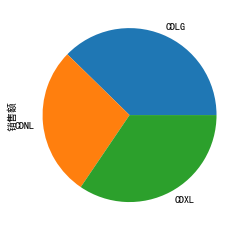

In [16]:
(df.groupby('门店编号')['销售额'].sum()/df.销售额.sum()).plot.pie()

### 哪些时间时间段是客流高峰期

In [17]:
df['小时'] = df['成交时间'].apply(lambda x:x.strftime('%H'))

In [18]:
df

,商品ID,类别ID,门店编号,单价,销量,成交时间,订单ID,销售额,小时
0,30006206,915000003,CDNL,25.23,0.328,2017-01-03 09:56:00,20170103CDLG000210052759,8.27544,09
1,30163281,914010000,CDNL,2.00,2.000,2017-01-03 09:56:00,20170103CDLG000210052759,4.00000,09
2,30200518,922000000,CDNL,19.62,0.230,2017-01-03 09:56:00,20170103CDLG000210052759,4.51260,09
3,29989105,922000000,CDNL,2.80,2.044,2017-01-03 09:56:00,20170103CDLG000210052759,5.72320,09
4,30179558,915000100,CDNL,47.41,0.226,2017-01-03 09:56:00,20170103CDLG000210052759,10.71466,09
...,...,...,...,...,...,...,...,...,...
3473,30031870,915030401,CDXL,6.58,0.862,2017-01-03 10:59:00,20170103CDLG000510025147,5.67196,10
3474,30008276,911010501,CDXL,15.42,0.481,2017-01-03 11:00:00,20170103CDLG000510025148,7.41702,11
3475,30033854,910000000,CDXL,9.62,1.000,2017-01-03 11:17:00,20170103CDLG000510025149,9.62000,11
3476,30206214,910000000,CDXL,15.62,1.000,2017-01-03 11:40:00,20170103CDLG000510025150,15.62000,11


之所以要对小时和订单进行去重处理,是因为我们用的订单表是以商品ID为主键的,在一个小时内可能会出现多个相同的订单ID,这些订单ID来自同一个人,所以算作一个人

In [19]:
traffic = df[['小时','订单ID']].drop_duplicates()
traffic

,小时,订单ID
0,09,20170103CDLG000210052759
10,09,20170103CDLG000210052760
15,09,20170103CDLG000210052761
22,10,20170103CDLG000210052762
23,10,20170103CDLG000210052763
...,...,...
3472,10,20170103CDLG000510025147
3474,11,20170103CDLG000510025148
3475,11,20170103CDLG000510025149
3476,11,20170103CDLG000510025150


<IPython.core.display.Javascript object>

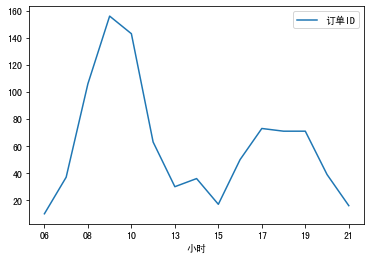

In [20]:
pd.pivot_table(traffic,index='小时', values='订单ID',aggfunc='count').plot()